In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from collections import defaultdict
sns.set_style("ticks")


In [2]:
params = {'axes.labelsize': 'large',
          'axes.titlesize':'large'}       ###'axes.titlesize':'xx-large'
pylab.rcParams.update(params)

In [30]:
df = pd.read_csv('/Users/zihaoxu/R_repos/BLB-RF-Sim/CSV/MSE~s_clustered.csv')

In [31]:
df

,Unnamed: 0,n,gamma,s,ntree,time,MSE
0,1,10000,0.5,1,500,3.795401,152.132764
1,2,10000,0.5,3,500,3.803725,124.376185
2,3,10000,0.5,5,500,3.888005,111.031906
3,4,10000,0.5,7,500,3.859057,107.780798
4,5,10000,0.5,9,500,3.840801,104.342140
5,6,10000,0.5,11,500,3.851892,101.947843
6,7,10000,0.5,13,500,3.868270,100.604845
7,8,10000,0.5,15,500,3.918720,101.521945
8,9,10000,0.5,17,500,4.019730,100.208006
9,10,10000,0.6,1,500,9.516835,47.970921


In [35]:
def findStopMSE(df):
    if 'Unnamed: 0' in list(df):
        df.drop('Unnamed: 0', axis = 1, inplace = True)
    index_to_be_used = []
#     print(df['gamma'].unique())
    for ga in df['gamma'].unique():
        ga_df = df[df.gamma==ga]
        ga_index = list(ga_df.index)
        print(ga_index)
        for ind in ga_index:
            print(ind)
            if ind != min(ga_index):
                pct_change = (ga_df.loc[ind,'MSE'] - ga_df.loc[ind-1,'MSE']) / ga_df.loc[ind-1,'MSE']
                if pct_change <= -0.01:
                    print(pct_change)
                    index_to_be_used.append(ind)
                else:
                    break
            else:
                index_to_be_used.append(ind)
        
#         min_MSE = min(ga_df['MSE'])
#         min_index = list(ga_df[ga_df.MSE==min_MSE].index)[0]
#         for dex in ga_index:
#             if dex <= min_index:
                
        
    new = df.loc[index_to_be_used, :]
    new.index = range(len(new))
    return(new)
stop_df = findStopMSE(df)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
0
1
-0.182449713085
2
-0.107289665183
3
-0.0292808450753
4
-0.0319041816217
5
-0.0229465934191
6
-0.013173388946
7
[9, 10, 11, 12, 13, 14, 15, 16, 17]
9
10
-0.163769701354
11
-0.129194712892
12
-0.0315436318929
13
-0.0287778181305
14
-0.0237568378974
15
[18, 19, 20, 21, 22, 23, 24, 25, 26]
18
19
-0.185663548721
20
-0.0909304106721
21
[27, 28, 29, 30, 31, 32, 33, 34]
27
28
-0.109246167055
29
-0.0828838685254
30
-0.0165866121963
31
[35, 36, 37, 38]
35
36
-0.180503211445
37
-0.0185174757124
38
-0.0329817503196


In [36]:
df

,n,gamma,s,ntree,time,MSE
0,10000,0.5,1,500,3.795401,152.132764
1,10000,0.5,3,500,3.803725,124.376185
2,10000,0.5,5,500,3.888005,111.031906
3,10000,0.5,7,500,3.859057,107.780798
4,10000,0.5,9,500,3.840801,104.342140
5,10000,0.5,11,500,3.851892,101.947843
6,10000,0.5,13,500,3.868270,100.604845
7,10000,0.5,15,500,3.918720,101.521945
8,10000,0.5,17,500,4.019730,100.208006
9,10000,0.6,1,500,9.516835,47.970921


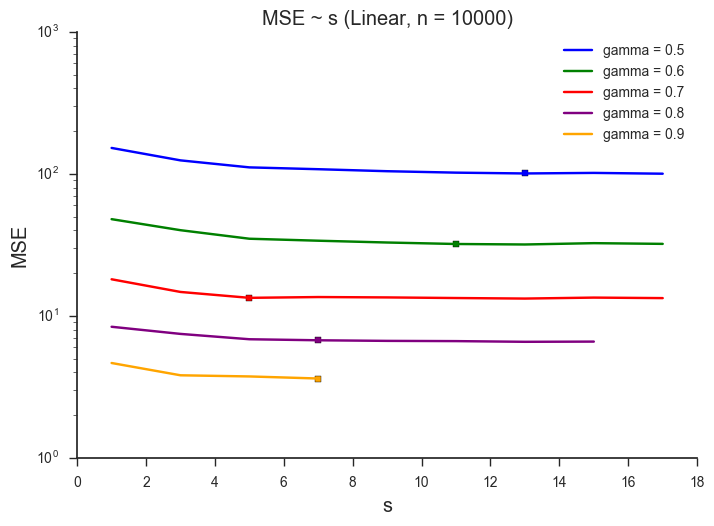

In [37]:
plt.figure()
color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'orange',1:'orange'}
for ga in stop_df['gamma'].unique():
    temp = stop_df[(stop_df['gamma']==ga) & (stop_df.ntree==500)]
    minMSE = min(temp.MSE)
    minRow = temp[temp.MSE==minMSE]
    plt.scatter(minRow['s'], minRow['MSE'], c = color_dict[ga], marker = 's', label = None)
    
for ga in df['gamma'].unique():
    temp = df[(df['gamma']==ga) & (df.ntree==500)]
    if(ga==.1):
        plt.scatter(temp['s'], temp['MSE'], s = 20, c = color_dict[ga], label = "gamma = " + str(ga), marker = 's')
    else:
        plt.semilogy(temp['s'], temp['MSE'], c = color_dict[ga], label = "gamma = " + str(ga))
plt.legend(loc = 1)
plt.xlabel('s')
plt.ylabel('MSE')
plt.title('MSE ~ s (Linear, n = 10000)')
sns.despine()
plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~s_clustered.png', dpi = 300, fmt = 'png')
plt.show()

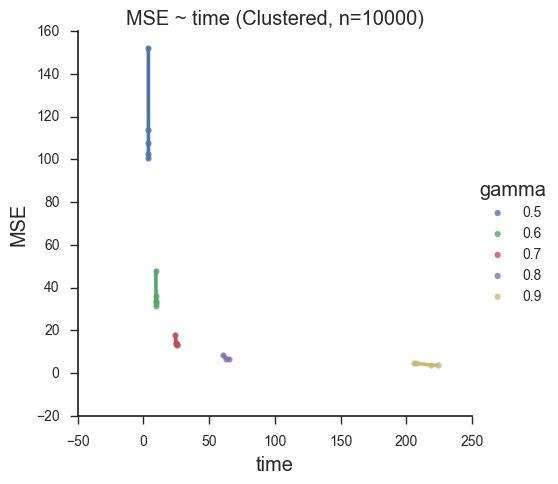

In [78]:
sns.lmplot(x = 'time', y = 'MSE', hue = 'gamma', data = df, col = 'ntree',lowess=True)
#plt.xlim(-15, 250)
#plt.ylim(-4, 160)
plt.title('MSE ~ time (Clustered, n=10000)')
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~time_clustered.png', dpi = 300, fmt = 'png')
plt.show()

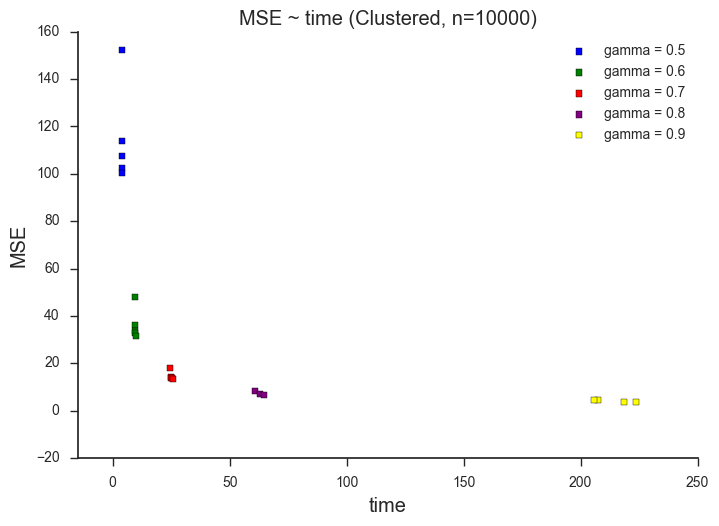

In [73]:
plt.figure()
symbol_list = ['o', 'v', ]
color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'yellow',1:'yellow'}
marker_dict = {100:'o', 300: '*', 500:'s'}
for ga in df['gamma'].unique():
    for ntree in df['ntree'].unique():
        temp = df[(df['gamma']==ga) & (df['ntree']==ntree)]
        plt.scatter(temp['time'], temp['MSE'], c = color_dict[ga], marker = marker_dict[ntree], label = "gamma = " + str(ga))
plt.legend(loc = 1)
plt.xlabel('time')
plt.ylabel('MSE')
plt.xlim(-15,250)
#plt.ylim(-10,420)
plt.title('MSE ~ time (Clustered, n=10000)')
sns.despine()
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~time2_clustered.png', dpi = 300, fmt = 'png')
plt.show()

In [44]:
new_df = defaultdict(list)
for ga in df['gamma'].unique():
    temp = df[df.gamma==ga]
    minMSE = min(temp['MSE'])
    minRow = temp[temp.MSE==minMSE]
    new_df['gamma'].append(float(minRow['gamma']))
    new_df['MSE'].append(float(minRow['MSE']))

In [45]:
pd.DataFrame(new_df)

,MSE,gamma
0,100.520528,0.5
1,31.608313,0.6
2,13.413855,0.7
3,6.643500,0.8
4,3.743293,0.9


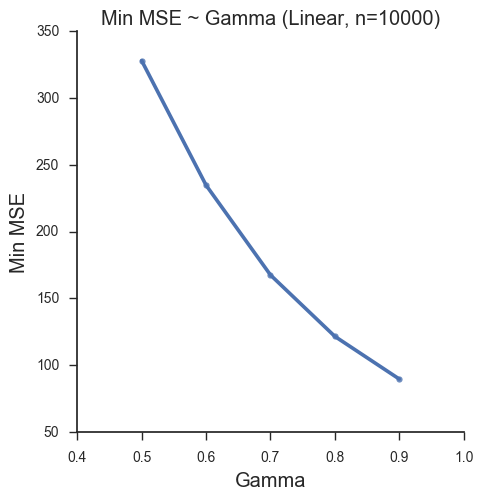

In [64]:
plt.figure()
color_dict = {.5:'y', .6:'orange', .7:'r', .8:'purple', .9:'b',1:'k'}
new_df = defaultdict(list)
for ga in df['gamma'].unique():
    temp = df[df.gamma==ga]
    minMSE = min(temp['MSE'])
    minRow = temp[temp.MSE==minMSE]
    new_df['gamma'].append(float(minRow['gamma']))
    new_df['MSE'].append(float(minRow['MSE']))
    #plt.scatter(minRow['gamma'], minRow['MSE'], c = color_dict[ga], label = 'gamma = ' +str(ga),s = 40, marker='s')
new_df = pd.DataFrame(new_df)
sns.lmplot('gamma', 'MSE',data = new_df, lowess = True)
#sns.lmplot('gamma', 'MSE',data = new_df, hue = 'gamma',lowess = True)
plt.xlabel('Gamma')
plt.ylabel('Min MSE')
#plt.xlim(.46, .94)
#plt.ylim(-12,120)
plt.title('Min MSE ~ Gamma (Linear, n=10000)')
sns.despine()
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MinMSE~gamma_linear.png', dpi = 300, fmt = 'png')
plt.show()